In [1]:
#Importing Necessary Libraries.

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

### Data Reading

In [2]:
# Reading the CSV file
df= pd.read_csv('Country-data.csv')
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [3]:
# Inspecting Data set
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
(167, 10)


There are 10 Columns and 167 Rows. Also, none of them have null Values.

In [4]:
# Checking Statistical description of the dataset.
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [5]:
#Inspecting Unique Values in each Column.
df.nunique().sort_values(ascending=True)

life_expec    127
total_fer     138
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
gdpp          157
country       167
dtype: int64

We can conclude that none of the variables are categorical variables. All of them except Country Name are Continous variables.

### Data Preparation

In [6]:
#Convering Columns Exports, Imports & Health in to actual values. They are mentioned in Percentages
df['exports']=(df['gdpp']*df['exports'])/100
df['imports']=(df['gdpp']*df['imports'])/100
df['health']=(df['gdpp']*df['health'])/100

df.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

### EDA

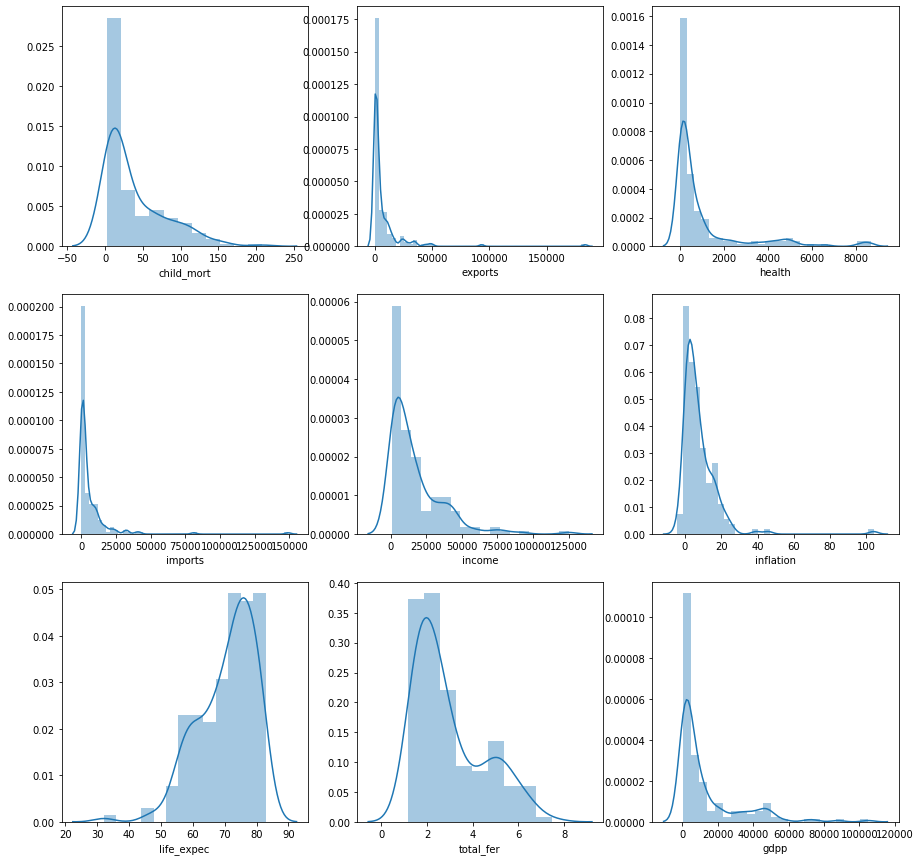

In [7]:
plt.figure(figsize=(15,15))
features=df.columns[1:]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])
    
    


From the above, we observe that :

1. Child mortality is highest in the range 0-25 and gradually decreases afterwards till 180 
2. Exports for most of the countries lies in the range 0 to 50000
3. Health expenditure of the most countries lies in the range 0 to 2000
4. Income per capita of maximum countries is below 50000
5. Life expectancy of most people lies in the 52 to 82
6. Inflation lies in the range -.2 to 26
7. GDPP of most countries is below 20000

In [8]:
#Univariate Analysis :
plt.figure(figsize=(15,15))
features=df.columns[1:]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])

From above, we can conclude that, gdpp, income, exports and imports have higher no of outliers.

1. Child_mort has outliers. However outliers are present at upper quantile which indicates that countries need aid. Hence we will not remove them. 
2. Exports, Imports, Income have higher no of outliers which will be treated.
3. For Life_expectancy outliers are present in lower quantile which we will keep it as it is.
4. Total_fer has few outliers, we will keep it as it is

### Bivariate Analysis

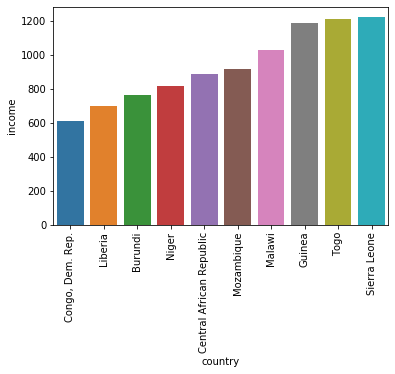

In [9]:
#Top 10 Countries with lower income: Plotting Country WRT income

low_income=df[['country','income']].sort_values('income',ascending=True).head(10)
sns.barplot(x='country', y='income',data=low_income)
plt.xticks(rotation=90)
plt.show()

    

    

The 10 countries with lowest income are as above.

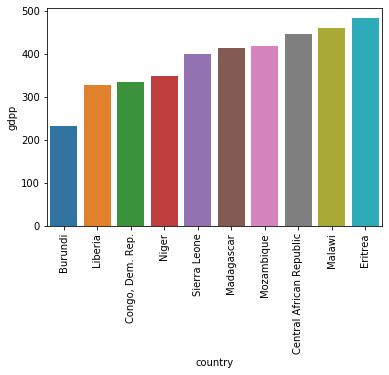

In [10]:
#Top 10 Countries with lower gdpp: Plotting Country WRT gdpp

low_GDP=df[['country','gdpp']].sort_values('gdpp',ascending=True).head(10)
sns.barplot(x='country', y='gdpp',data=low_GDP)
plt.xticks(rotation=90)
plt.show()

    


The 10 countries with lowest GDP are as above.

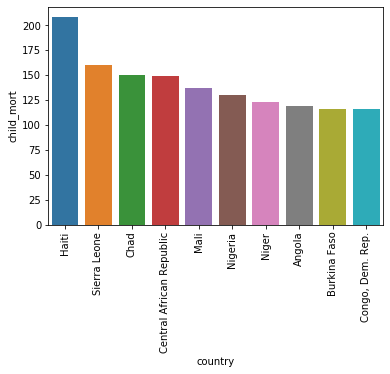

In [11]:
#Top 10 Countries with higher Child_mort: Plotting Country WRT Child_mort

high_mor=df[['country','child_mort']].sort_values('child_mort',ascending=False).head(10)
sns.barplot(x='country', y='child_mort',data=high_mor)
plt.xticks(rotation=90)
plt.show()


We can observe some countries such as Nigeria, Sierra Leone, Congo are present across Low Income, Low GDP and High Child Mortality

In [12]:
## Visualising pairplots
features=df.columns[1:]
sns.pairplot(df[features])
plt.show()

1.The higher the income, higher the GDP and lower the Child_mortality
2.The lower the income, lower the GDP and higher the Child_mortality


In [13]:
## Visualising Heatmap- to check correlation amongst Variables.

plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

    1. Export and import are highly correlated with 0.99
    2. Child_mort and total_fer are highly correlated with 0.85
    3. GDPP and Income are highly correlated with 0.9
    4. GDPP and health are highly correlated with 0.92
    4. Child_mort and life expectancy are highly negatively correlated with -0.89

### Outlier Treatment:

In [14]:
#As mentioned above, gdpp,exports, income variables have outliers and we will cap the same as below:



q4_income=df['income'].quantile(0.99)
q4_health=df['health'].quantile(0.99)
q4_exports=df['exports'].quantile(0.99)
q4_gdpp=df['gdpp'].quantile(0.99)
df['income'][df['income']>=q4_income]=q4_income
df['health'][df['health']>=q4_health]=q4_health
df['gdpp'][df['gdpp']>=q4_gdpp]=q4_gdpp
df['exports'][df['exports']>=q4_exports]=q4_exports

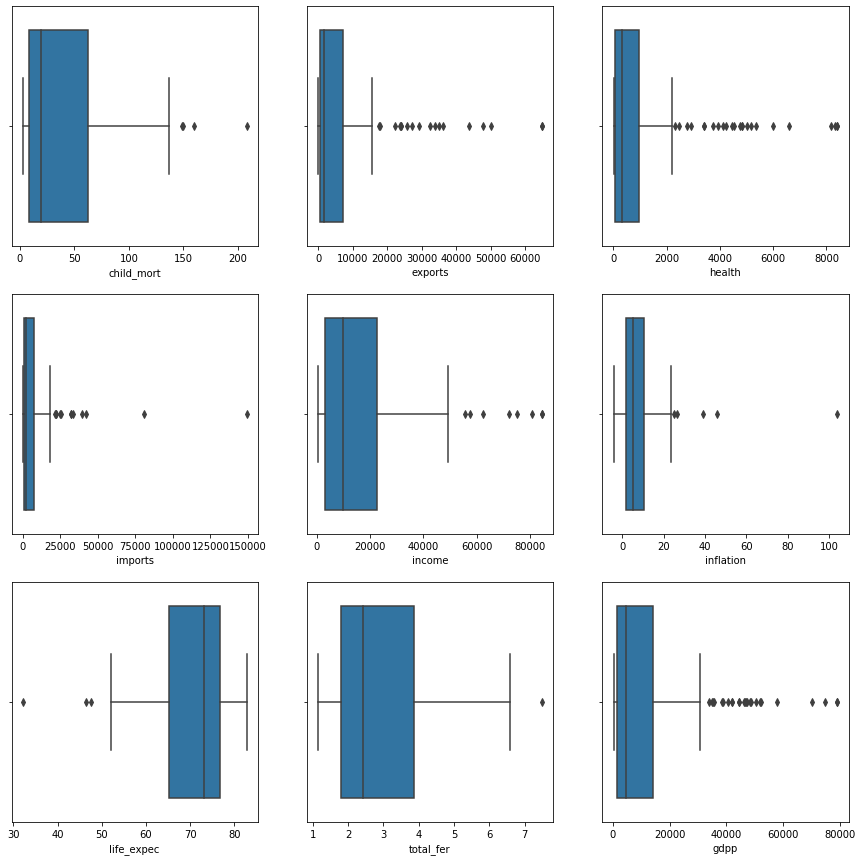

In [15]:
plt.figure(figsize=(15,15))
features=df.columns[1:]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])

We can see that even after capping features with 99 percentile values some of the features still have outliers, we will not modify further because our clustering algorithm will take care of it .
Also we have to focus on countries which have lower income , lower gdpp and Higher child mortality. 

### Hopkins Test

In [16]:
#Hopkins test

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [17]:
hopkins(df.drop('country',axis=1))

0.9444227968919621

This is a good hopkins score indicating there are groups present the datset which can be clustered together

### Scaling the Data 

In [18]:
#Dropping Country column.

df1=df.drop('country',axis=1)

In [19]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df1=scaler.fit_transform(df1)

In [20]:
df1=pd.DataFrame(df1)
df1.columns=df.columns[1:]
df1.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -0.569622 -0.566958 -0.432276 -0.851668   0.157336   -1.619092   
1   -0.538949 -0.473858 -0.440393 -0.313677 -0.386946  -0.312347    0.647866   
2   -0.272833 -0.424000 -0.486271 -0.353720 -0.221053   0.789274    0.670423   
3    2.007808 -0.381249 -0.534088 -0.345953 -0.612045   1.387054   -1.179234   
4   -0.695634 -0.086742 -0.178410  0.040735  0.125254  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.702259  
1  -0.859973 -0.498726  
2  -0.038404 -0.477434  
3   2.128151 -0.530950  
4  -0.541946 -0.032042

### Modelling using K Means Algorithm:

In [21]:
#Finding K using
# Elbow cure
#Silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ss=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k).fit(df1)
    ss.append([k,silhouette_score(df1,kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0],pd.DataFrame(ss)[1])
plt.show()

In [22]:
for k in range(2,11):
    kmeans1=KMeans(n_clusters=k,max_iter=50).fit(df1)
    ss=silhouette_score(df1,kmeans1.labels_)
    print("for n_clusters={0}, silhouette score is {1}" .format(k,ss))

for n_clusters=2, silhouette score is 0.4705182409630948
for n_clusters=3, silhouette score is 0.42234675014540163
for n_clusters=4, silhouette score is 0.42659997117454607
for n_clusters=5, silhouette score is 0.4302805351087127
for n_clusters=6, silhouette score is 0.4081332329733383
for n_clusters=7, silhouette score is 0.31166317722697334
for n_clusters=8, silhouette score is 0.2985789749125371
for n_clusters=9, silhouette score is 0.2931080591660154
for n_clusters=10, silhouette score is 0.27251663695647016


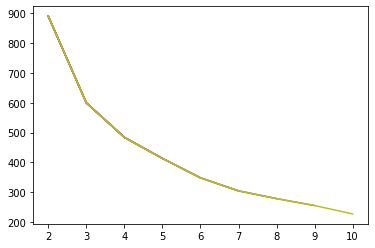

In [23]:
ssd=[]
for k in range(2,11):
    kmean=KMeans(n_clusters=k).fit(df1)
    ssd.append([k,kmean.inertia_])
    plt.plot(pd.DataFrame(ssd)[0],pd.DataFrame(ssd)[1])

By using elbow curve and Silhouette score we conclude that no of clusters will be 3.

In [24]:
#Final model with 3 Clusters
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [26]:
cluster_id=pd.DataFrame(kmeans.labels_,columns=['cluster_id'])


In [27]:
df.kmean=df.copy()

In [28]:
df.kmean=pd.concat([df.kmean,cluster_id],axis=1)
df.kmean.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer     gdpp  cluster_id  
0       9.44        56.2       5.82    553.0           2  
1       4.49        76.3       1.65   4090.0           0  
2      16.10        76.5       2.89   4460.0           0  
3      22.40        60.1       6.16   3530.0           2  
4       1.44        76.8       2.13  12200.0           0

In [29]:
#No of data points per cluster.
df.kmean.cluster_id.value_counts().sort_values(ascending=False)

0    92
2    48
1    27
Name: cluster_id, dtype: int64

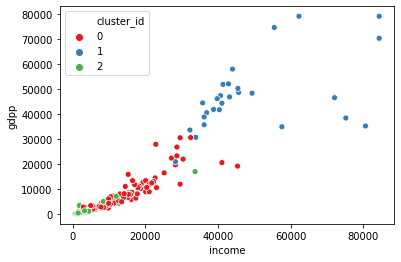

In [30]:
#Plotting 3 Vars wrt Cluster_id
sns.scatterplot(x='income',y='gdpp',hue='cluster_id',data=df.kmean,palette='Set1')
plt.show()

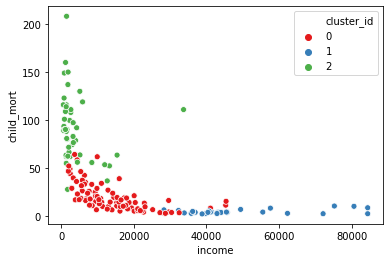

In [31]:
sns.scatterplot(x='income',y='child_mort',hue='cluster_id',data=df.kmean,palette='Set1')
plt.show()

In [32]:
sns.scatterplot(x='gdpp',y='child_mort',hue='cluster_id',data=df.kmean,palette='Set1')
plt.show()

### Cluster Profiling

In [33]:
#Clustering Profiling
df.kmean.filter(['child_mort','income','gdpp','cluster_id'],axis=1).groupby("cluster_id").mean()

child_mort        income          gdpp
cluster_id                                        
0            20.177174  14169.456522   8226.869565
1             5.092593  49057.333333  47476.888889
2            91.610417   3897.354167   1909.208333

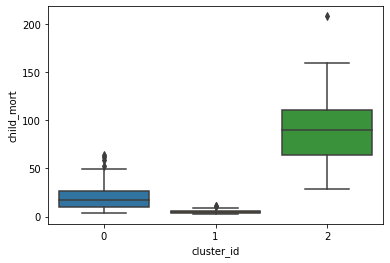

In [34]:
#Plotting 
sns.boxplot(x='cluster_id', y='child_mort', data=df.kmean)
plt.show()

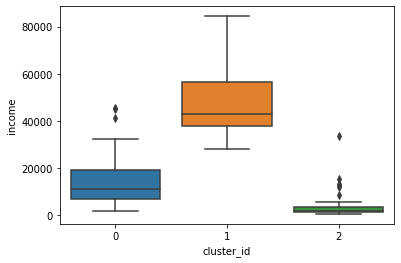

In [35]:
sns.boxplot(x='cluster_id', y='income', data=df.kmean)
plt.show()

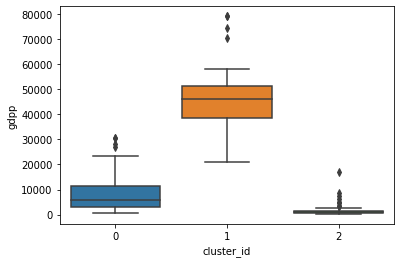

In [36]:
sns.boxplot(x='cluster_id', y='gdpp', data=df.kmean)
plt.show()

From above we can conclude that 
1. Cluster 0 : Medium gdpp, Medium income and Medium Child_mort.
2. Cluster 1: High gdpp, High income and Low Child_mort.
3. Cluster 2: Low gdpp, Low income and High Child_mort.
 
 Hence, Cluster 2 group of countires should be provided with aid.

In [37]:
# Countires which need aid.
countries_aid=df.kmean[df.kmean['cluster_id']==2].sort_values(by=['child_mort','income','gdpp'],ascending=[False, True, True])
countries_aid[['country']]

country
66                      Haiti
132              Sierra Leone
32                       Chad
31   Central African Republic
97                       Mali
113                   Nigeria
112                     Niger
3                      Angola
37           Congo, Dem. Rep.
25               Burkina Faso
64              Guinea-Bissau
17                      Benin
40              Cote d'Ivoire
49          Equatorial Guinea
63                     Guinea
28                   Cameroon
106                Mozambique
87                    Lesotho
99                 Mauritania
26                    Burundi
116                  Pakistan
94                     Malawi
150                      Togo
0                 Afghanistan
88                    Liberia
36                    Comoros
166                    Zambia
155                    Uganda
56                     Gambia
84                        Lao
142                     Sudan
59                      Ghana
147                  Tanzania
129                   Senegal
38                Congo, Rep.
55                      Gabon
126                    Rwanda
81                   Kiribati
149               Timor-Leste
93                 Madagascar
80                      Kenya
165                     Yemen
108                   Namibia
50                    Eritrea
137              South Africa
21                   Botswana
72                       Iraq
136           Solomon Islands

The above countires need aid as they have high mortality, low income & low gdpp

### Hierarchical Clustering

In [38]:
#Now we will do Hierarchical Clustering to arrive at the countires that need aid.
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [39]:
df1.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -0.569622 -0.566958 -0.432276 -0.851668   0.157336   -1.619092   
1   -0.538949 -0.473858 -0.440393 -0.313677 -0.386946  -0.312347    0.647866   
2   -0.272833 -0.424000 -0.486271 -0.353720 -0.221053   0.789274    0.670423   
3    2.007808 -0.381249 -0.534088 -0.345953 -0.612045   1.387054   -1.179234   
4   -0.695634 -0.086742 -0.178410  0.040735  0.125254  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.702259  
1  -0.859973 -0.498726  
2  -0.038404 -0.477434  
3   2.128151 -0.530950  
4  -0.541946 -0.032042

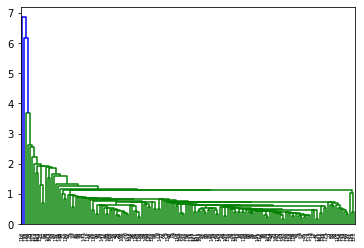

In [40]:
#Using Single Linkage:
hc=linkage(df1,method='single',metric='euclidean')
dendrogram(hc)
plt.show()

We are not able to cluster the dataset properly hence we will use complete linkage

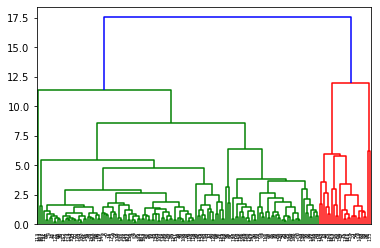

In [41]:
hc=linkage(df1,method='complete',metric='euclidean')
dendrogram(hc)
plt.show()

In [42]:
# 3 Clusters
cluster_id2= cut_tree(hc,n_clusters=3).reshape(-1,)
cluster_id2

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [43]:
df_hir=df.copy()

In [44]:
df_hir['cluster_id2']=cluster_id2
df_hir.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer     gdpp  cluster_id2  
0       9.44        56.2       5.82    553.0            0  
1       4.49        76.3       1.65   4090.0            0  
2      16.10        76.5       2.89   4460.0            0  
3      22.40        60.1       6.16   3530.0            0  
4       1.44        76.8       2.13  12200.0            0

In [45]:
#Profiling.
df_hir.filter(['child_mort','income','gdpp','cluster_id2'],axis=1).groupby("cluster_id2").mean()

child_mort        income          gdpp
cluster_id2                                        
0             44.398582  10782.716312   6168.184397
1              5.220833  47432.250000  47291.166667
2              2.800000  78237.000000  62844.000000

In [46]:
df_hir.cluster_id2.value_counts()

0    141
1     24
2      2
Name: cluster_id2, dtype: int64

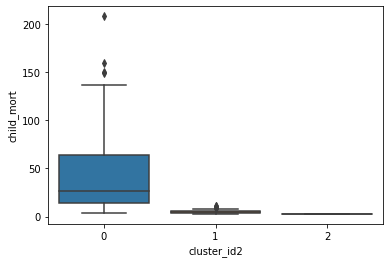

In [47]:
sns.boxplot(x='cluster_id2', y='child_mort', data=df_hir)
plt.show()

In [48]:
sns.boxplot(x='cluster_id2', y='income', data=df_hir)
plt.show()

In [49]:
sns.boxplot(x='cluster_id2', y='gdpp', data=df_hir)
plt.show()

From above,
1. Cluster 1- Medium Income, Medium GDP, Medilum Child Mortality
2. Cluster 2 - High Income, High GDP, low Child Mortality.
3. Cluster 0- Low Income, Low GDP, High Mortality.

Cluster 0 are the countires which are in need of aid

In [50]:
# Countries with cluster 2:
countires_aid_hir=df_hir[df_hir['cluster_id2']==0].sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True])
countires_aid_hir[['country']]

country
66                      Haiti
132              Sierra Leone
32                       Chad
31   Central African Republic
97                       Mali
..                        ...
122                  Portugal
60                     Greece
42                     Cyprus
43             Czech Republic
135                  Slovenia

[141 rows x 1 columns]

As we can observe that, either through K means or Hierarchical Clustering, we are arrive at same top 5 countires who are in dier need of help. Top 5 countries help to be assigned are Haiti, Sierra Leone, Chad, Central African Republic, Mali